# ------------------------------------DATA CLEANING--------------------------------------

# DATA CLEANING 2016

### Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import csv

### Loading the Csvs and combining into a single dataframe

In [3]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'

In [4]:
df = pd.read_csv(open(cur_path+'/Data2016_Uncleaned.csv','rU'), encoding='utf-8')

### CLEANING

In [5]:
df.shape

(5617658, 109)

### Getting rid of columns having 98% or more missing data

In [6]:
missing_data = df.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/df.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent<99.38)]
len(features)

62

In [7]:
d = df[features]

In [8]:
d.columns

Index(['Year', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'DestAirportSeqID',
       'CRSDepTime', 'CRSArrTime', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'Flights', 'DistanceGroup', 'DivAirportLandings', 'DepTimeBlk',
       'DestAirportID', 'Distance', 'OriginStateName', 'OriginWac', 'Month',
       'DayofMonth', 'DayOfWeek', 'FlightDate', 'UniqueCarrier', 'AirlineID',
       'Carrier', 'Quarter', 'Origin', 'OriginStateFips', 'OriginState',
       'OriginCityName', 'FlightNum', 'OriginCityMarketID',
       'OriginAirportSeqID', 'OriginAirportID', 'CRSElapsedTime', 'TailNum',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'WheelsOff', 'TaxiOut', 'TaxiIn', 'WheelsOn',
       'ArrTime', 'ArrivalDelayGroups', 'ActualElapsedTime', 'AirTime',
       'ArrDel15', 'ArrDelayMinutes', 'ArrDelay', 'SecurityDelay',
       'LateAircraftDelay', 'WeatherDelay', 'CarrierDelay', 'NASDelay

In [10]:
d.shape

(5617658, 64)

### Adding new columns to differentiate flights felayed and ontime flights

In [9]:
d['Flight_Status'] = 0
d.loc[df.DepDel15==1.0 ,'Flight_Status'] = 1
d.loc[df.ArrDel15==1.0,'Flight_Status'] = 1
d.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
d['Flight_Status'] = d['Flight_Status'].astype(int)
d['Status'] = np.where(d['Flight_Status']==1,'Delayed', 'On Time')

### Taking only the columns relevant for the delay

In [15]:
cols = d.columns.tolist()
p = ['FlightDate','TailNum','Carrier','OriginAirportSeqID','OriginCityMarketID','OriginStateFips','OriginState','OriginWac','DestAirportSeqID',
     'DestCityMarketID','DestStateFips','DestWac','DepDelay','DepDel15','DepTimeBlk','SecurityDelay','LateAircraftDelay', 'WeatherDelay', 
     'CarrierDelay', 'NASDelay','DivAirportLandings','ArrDelay','ArrDel15','ArrTimeBlk','Diverted','Flights','AirTime','DistanceGroup',
     'CancellationCode','DestState']
for i in p:
    if i in cols:
        cols.remove(i)

In [16]:
len(p)

30

In [17]:
len(cols)

34

In [18]:
dt= d[cols]
dt.shape

(5617658, 34)

In [19]:
dt.isnull().sum()

Year                        0
Dest                        0
DestCityName                0
DestStateName               0
CRSDepTime                  0
CRSArrTime                  0
Cancelled                   0
DestAirportID               0
Distance                    0
OriginStateName             0
Month                       0
DayofMonth                  0
DayOfWeek                   0
UniqueCarrier               0
AirlineID                   0
Quarter                     0
Origin                      0
OriginCityName              0
FlightNum                   0
OriginAirportID             0
CRSElapsedTime              6
DepTime                 63456
DepDelayMinutes         63456
DepartureDelayGroups    63456
WheelsOff               65418
TaxiOut                 65418
TaxiIn                  67844
WheelsOn                67844
ArrTime                 67844
ArrivalDelayGroups      79513
ActualElapsedTime       79513
ArrDelayMinutes         79513
Flight_Status               0
Status    

### Removing all the Cancelled Flights details

In [20]:
dt = dt[dt['Cancelled']!=1]

In [21]:
del dt['Cancelled']
dt.shape

(5551797, 33)

In [22]:
dt.isnull().sum()

Year                        0
Dest                        0
DestCityName                0
DestStateName               0
CRSDepTime                  0
CRSArrTime                  0
DestAirportID               0
Distance                    0
OriginStateName             0
Month                       0
DayofMonth                  0
DayOfWeek                   0
UniqueCarrier               0
AirlineID                   0
Quarter                     0
Origin                      0
OriginCityName              0
FlightNum                   0
OriginAirportID             0
CRSElapsedTime              0
DepTime                     0
DepDelayMinutes             0
DepartureDelayGroups        0
WheelsOff                   0
TaxiOut                     0
TaxiIn                   1983
WheelsOn                 1983
ArrTime                  1983
ArrivalDelayGroups      13652
ActualElapsedTime       13652
ArrDelayMinutes         13652
Flight_Status               0
Status                      0
dtype: int

### Removing row having 'ArrTime','ArrDelayMinutes','ActualElapsedTime','ArrDelayMinutes' Nulls

In [23]:
dt = dt[dt['ArrTime'].notnull() & dt['ArrDelayMinutes'].notnull() & dt['ActualElapsedTime'].notnull() & dt['ArrDelayMinutes'].notnull()]
dt.shape

(5538145, 33)

In [24]:
dt.isnull().sum()

Year                    0
Dest                    0
DestCityName            0
DestStateName           0
CRSDepTime              0
CRSArrTime              0
DestAirportID           0
Distance                0
OriginStateName         0
Month                   0
DayofMonth              0
DayOfWeek               0
UniqueCarrier           0
AirlineID               0
Quarter                 0
Origin                  0
OriginCityName          0
FlightNum               0
OriginAirportID         0
CRSElapsedTime          0
DepTime                 0
DepDelayMinutes         0
DepartureDelayGroups    0
WheelsOff               0
TaxiOut                 0
TaxiIn                  0
WheelsOn                0
ArrTime                 0
ArrivalDelayGroups      0
ActualElapsedTime       0
ArrDelayMinutes         0
Flight_Status           0
Status                  0
dtype: int64

In [25]:
dt.shape

(5538145, 33)

In [26]:
dd = dt
dd.shape

(5538145, 33)

### Removing Outliers

In [27]:
dt[dt.DepDelayMinutes>1350].shape

(48, 33)

In [28]:
dt[dt.ArrDelayMinutes>1400].shape

(41, 33)

In [29]:
dd = dd[dd.DepDelayMinutes<1350]
dd.shape

(5538095, 33)

In [30]:
dd = dd[dd.ArrDelayMinutes<1400]
dd.shape

(5538095, 33)

In [31]:
#dd[(dd.Month==4) & (dd.ArrDelayMinutes >1200)]

In [32]:
#dd[(dd.Month==9) & (dd.ArrDelayMinutes >1210)]

In [33]:
dd = dd.drop(((dd.Month==4) & (dd.ArrDelayMinutes >1200))|((dd.DepDelayMinutes>1200) & (dd.Month==2)) |((dd.DepDelayMinutes>1210) & (dd.Month==5))|((dd.DepDelayMinutes>1200) & (dd.Month==9))| ((dd.DepDelayMinutes>1220) & (dd.Month==10))|((dd.DepDelayMinutes>1200) & (dd.Month==11))|((dd.DepDelayMinutes>1300) & (dd.Month==12)))

In [34]:
dd.shape

(5538093, 33)

In [35]:
dd = dd[dd.ArrDelayMinutes <= 1325]

In [36]:
#dd[(dd.DepDelayMinutes>1200) & (dd.Month==2)]

In [37]:
#dd[(dd.DepDelayMinutes>1210) & (dd.Month==5)]

In [38]:
#dd[(dd.DepDelayMinutes>1200) & (dd.Month==9)]

In [39]:
#dd[(dd.DepDelayMinutes>1220) & (dd.Month==10)]

In [40]:
#dd[(dd.DepDelayMinutes>1200) & (dd.Month==11)]

In [243]:
#dd[(dd.DepDelayMinutes>1300) & (dd.Month==12)]

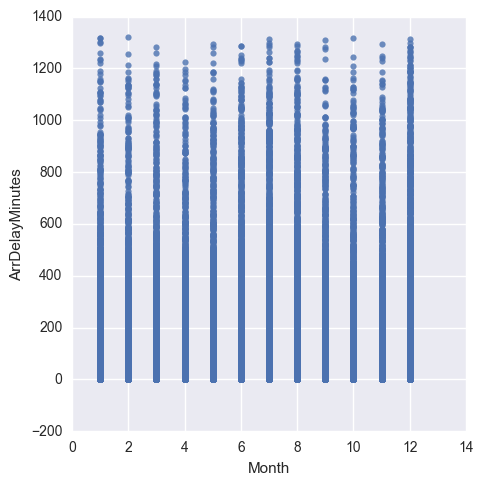

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dd, fit_reg=False)
plt.show()

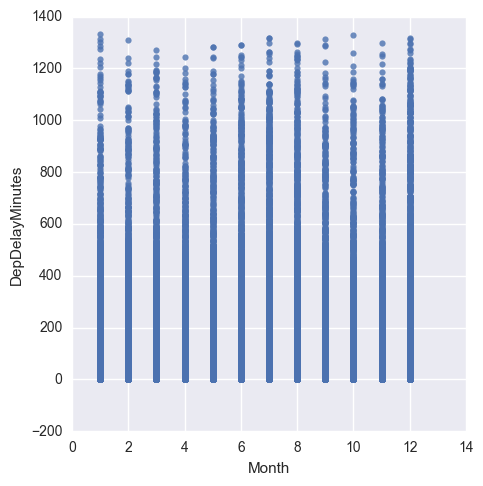

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=dd, fit_reg=False)
plt.show()

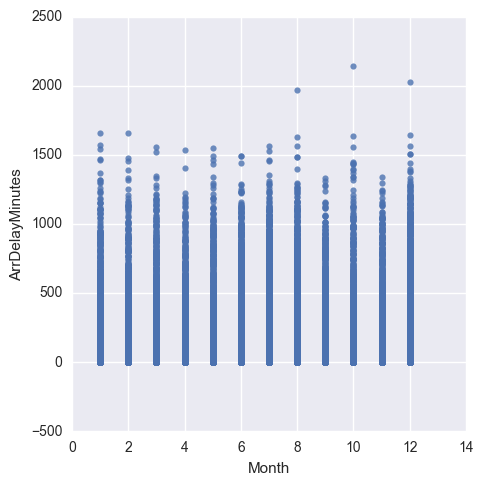

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=dt, fit_reg=False)
plt.show()

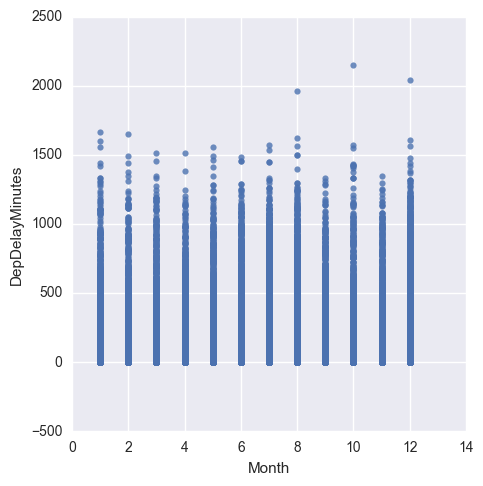

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=dt, fit_reg=False)
plt.show()

In [41]:
dd.columns

Index(['Year', 'Dest', 'DestCityName', 'DestStateName', 'CRSDepTime',
       'CRSArrTime', 'DestAirportID', 'Distance', 'OriginStateName', 'Month',
       'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'AirlineID', 'Quarter',
       'Origin', 'OriginCityName', 'FlightNum', 'OriginAirportID',
       'CRSElapsedTime', 'DepTime', 'DepDelayMinutes', 'DepartureDelayGroups',
       'WheelsOff', 'TaxiOut', 'TaxiIn', 'WheelsOn', 'ArrTime',
       'ArrivalDelayGroups', 'ActualElapsedTime', 'ArrDelayMinutes',
       'Flight_Status', 'Status'],
      dtype='object')

In [42]:
dd.to_csv(cur_path+'/Data2016_Cleaned.csv', index = False)

# DATA CLEANING 2017

In [43]:
df1 = pd.read_csv(open(cur_path+'/Data2017_Uncleaned.csv','rU'), encoding='utf-8')

In [44]:
df1.shape

(4276457, 109)

In [45]:
missing_data1 = df1.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data1['Missing_percent'] = (missing_data1['Missing_Count']/df1.shape[0])*100
missing_data1 = missing_data1.sort_values(by='Missing_percent', axis=0, ascending=True)
features1 = missing_data1['index'][(missing_data1.Missing_percent<99.38)]
len(features1)

62

In [46]:
d1 = df1[features1]

In [47]:
d1['Flight_Status'] = 0
d1.loc[df.DepDel15==1.0 ,'Flight_Status'] = 1
d1.loc[df.ArrDel15==1.0,'Flight_Status'] = 1
d1.loc[df.Cancelled==1.0, ['Flight_Status']] = 1
d1['Flight_Status'] = d1['Flight_Status'].astype(int)
d1['Status'] = np.where(d1['Flight_Status']==1,'Delayed', 'On Time')

In [48]:
dt1= d1[cols]
dt1.shape

(4276457, 34)

In [49]:
dt1.isnull().sum()

Year                        0
Dest                        0
DestCityName                0
DestStateName               0
CRSDepTime                  0
CRSArrTime                  0
Cancelled                   0
DestAirportID               0
Distance                    0
OriginStateName             0
Month                       0
DayofMonth                  0
DayOfWeek                   0
UniqueCarrier               0
AirlineID                   0
Quarter                     0
Origin                      0
OriginCityName              0
FlightNum                   0
OriginAirportID             0
CRSElapsedTime              7
DepTime                 70648
DepDelayMinutes         70672
DepartureDelayGroups    70672
WheelsOff               72211
TaxiOut                 72214
TaxiIn                  74220
WheelsOn                74220
ArrTime                 74220
ArrivalDelayGroups      82860
ActualElapsedTime       82860
ArrDelayMinutes         82860
Flight_Status               0
Status    

In [50]:
dt1 = dt1[dt1['Cancelled']!=1]
del dt1["Cancelled"]

In [51]:
dt1 = dt1[dt1['ArrTime'].notnull() & dt1['ArrDelayMinutes'].notnull() & dt1['ActualElapsedTime'].notnull() & dt1['ArrDelayMinutes'].notnull()]
dt1.shape

(4193597, 33)

In [52]:
d1 = dt1

In [53]:
d1 = d1[d1.DepDelayMinutes<1500]

In [54]:
d1 = d1[d1.ArrDelayMinutes<1500]

In [55]:
d1.shape

(4193573, 33)

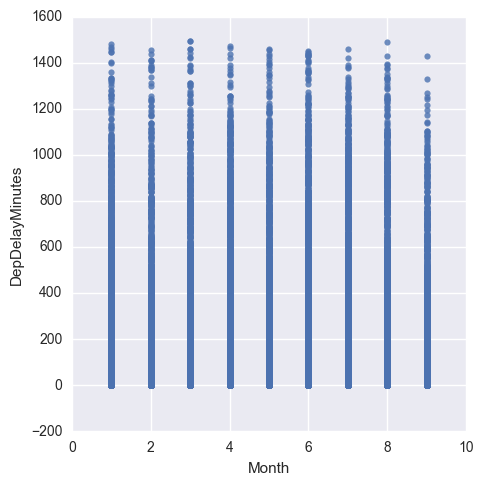

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='DepDelayMinutes', data=d1, fit_reg=False)
plt.show()

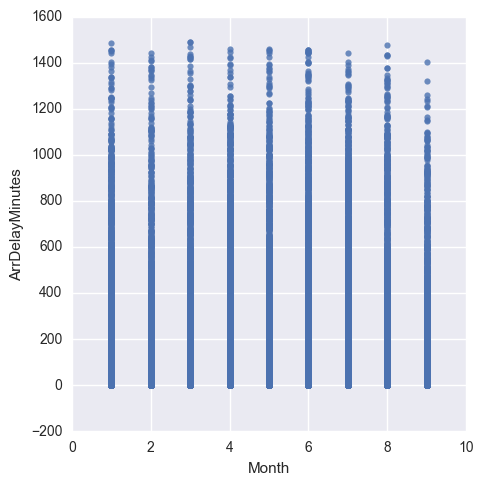

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

sns.lmplot(x='Month', y='ArrDelayMinutes', data=d1, fit_reg=False)
plt.show()

In [56]:
d1 = d1.drop((d1.Month==9) & (d1.ArrDelayMinutes>1270)|(d1.Month==9) & (d1.DepDelayMinutes>1270)|(d1.Month==8) & (d1.DepDelayMinutes>1410))

In [58]:
d1.shape

(4193571, 33)

In [57]:
d1.isnull().sum()

Year                    0
Dest                    0
DestCityName            0
DestStateName           0
CRSDepTime              0
CRSArrTime              0
DestAirportID           0
Distance                0
OriginStateName         0
Month                   0
DayofMonth              0
DayOfWeek               0
UniqueCarrier           0
AirlineID               0
Quarter                 0
Origin                  0
OriginCityName          0
FlightNum               0
OriginAirportID         0
CRSElapsedTime          0
DepTime                 0
DepDelayMinutes         0
DepartureDelayGroups    0
WheelsOff               0
TaxiOut                 0
TaxiIn                  0
WheelsOn                0
ArrTime                 0
ArrivalDelayGroups      0
ActualElapsedTime       0
ArrDelayMinutes         0
Flight_Status           0
Status                  0
dtype: int64

In [59]:
d1.to_csv(cur_path+'/Data2017_Cleaned.csv', index = False)

# END